In [1]:
%reload_ext autoreload

import reservoirpy as rpy
rpy.verbosity(0)  # 詳細なログは不要
rpy.set_seed(42)  # 再現性を確保

from CustomReservoir import CustomReservoir
from NeuronModel import LIFNeuronModel
import numpy as np

# LIFニューロンモデルを作成
lif_model = LIFNeuronModel(time_constant=0.01, threshold=0.3, reset_potential=0.0)

# カスタムリザバーを作成
reservoir = CustomReservoir(
    units=10,  # ニューロン数
    lr=0.5,
    sr=0.9,
    neuron_model=lif_model,  # LIFニューロンモデル
    fb_connectivity=0.0 # フィードバック結合なし
)

# 入力データ
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

spike = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    spike[i] = reservoir(X[i].reshape(1, -1))

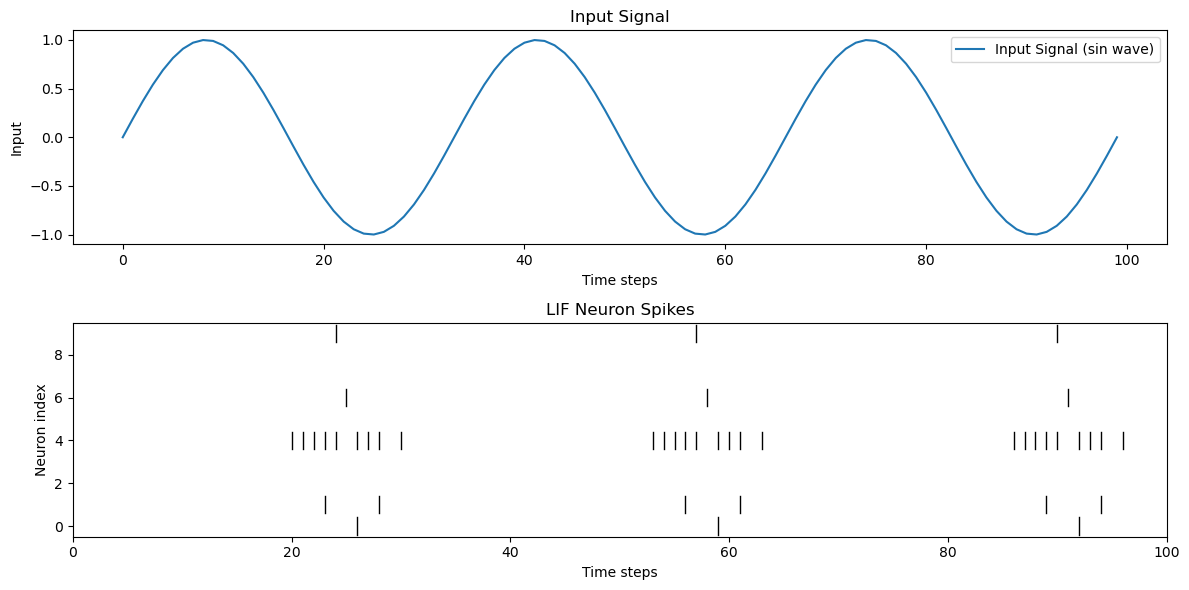

In [2]:
# 入力とステートのプロット
import matplotlib.pyplot as plt
# スパイクデータをプロットするためのコード

plt.figure(figsize=(12, 6))

# 入力データのプロット
plt.subplot(2, 1, 1)
plt.plot(X, label="Input Signal (sin wave)")
plt.title("Input Signal")
plt.xlabel("Time steps")
plt.ylabel("Input")
plt.legend()

# スパイクデータのプロット
plt.subplot(2, 1, 2)
plt.title("LIF Neuron Spikes")
for neuron_idx in range(spike.shape[1]):
    for t, spike_value in enumerate(spike[:, neuron_idx]):
        if spike_value > 0:
            plt.plot([t, t], [neuron_idx - 0.4, neuron_idx + 0.4], color='k', linestyle='-', linewidth=1)  # 発火したタイムステップに黒い縦線を表示

plt.xlabel("Time steps")
plt.ylabel("Neuron index")
# plt.yticks(np.arange(spike.shape[1]))  # 縦軸にニューロンインデックスを表示
plt.xlim(0, len(X))
plt.ylim(-0.5, spike.shape[1] - 0.5)

plt.tight_layout()
plt.show()